In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, ConfusionMatrixDisplay
)

import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv("/content/hypertension_data.csv")

# Drop missing values in key features
df = df.dropna(subset=['sex'])

# Show basic info
print(df.shape)
print(df.dtypes)
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True) * 100)

df.head()

(26058, 14)
age         float64
sex         float64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
target
1    14274
0    11784
Name: count, dtype: int64
target
1    54.777803
0    45.222197
Name: proportion, dtype: float64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


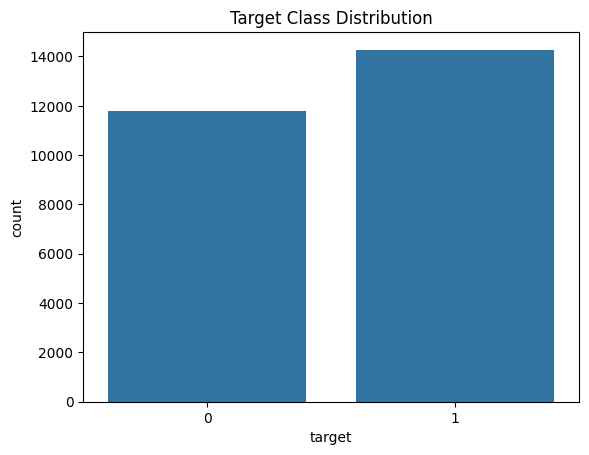

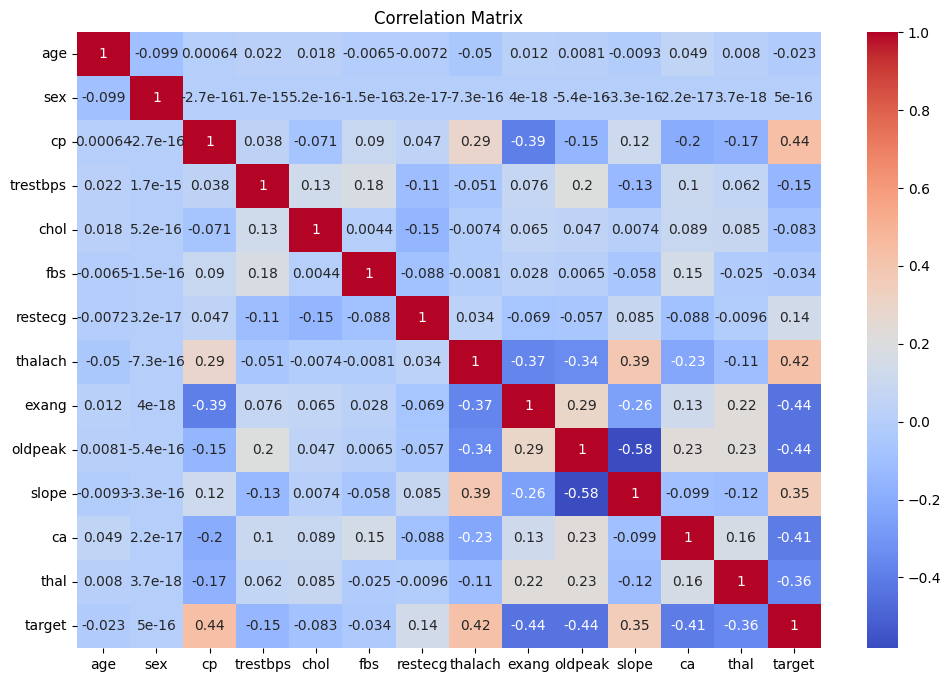

In [7]:
# Visualisation of the Data

# Target distribution
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution")
plt.show()
print("")
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [8]:
# Prepare Features and Labels

# Define input and target
X = df.drop("target", axis=1)
y = df["target"]

# Show feature names
print("Features:", X.columns.tolist())

Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [10]:
# Build Pipeline

# Create a pipeline: scaling + logistic regression
clf_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression())
])
print("Pipeline created successfully...")

Pipeline created successfully...


In [15]:
#Split the Data and Train the Model

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train model
clf_pipeline.fit(X_train, y_train)

print("Model trained successfully...")

Model trained successfully...


In [17]:
# Make Predictions

# Predict
y_pred = clf_pipeline.predict(X_test)
y_proba = clf_pipeline.predict_proba(X_test)[:, 1]

print("Predictions made successfully...")

Predictions made successfully...


In [20]:
# Performance Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8551419800460476

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83      2357
           1       0.83      0.92      0.87      2855

    accuracy                           0.86      5212
   macro avg       0.86      0.85      0.85      5212
weighted avg       0.86      0.86      0.85      5212



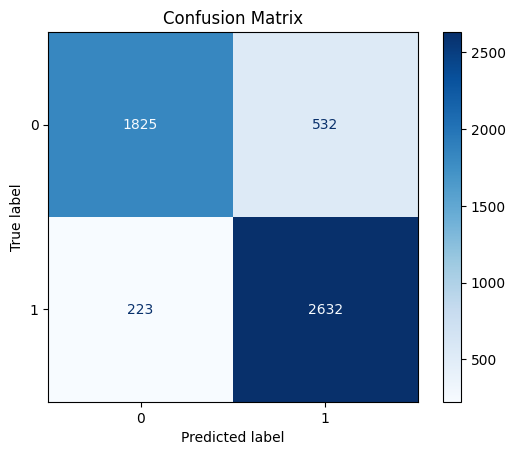

In [21]:
# Display the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_pipeline.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

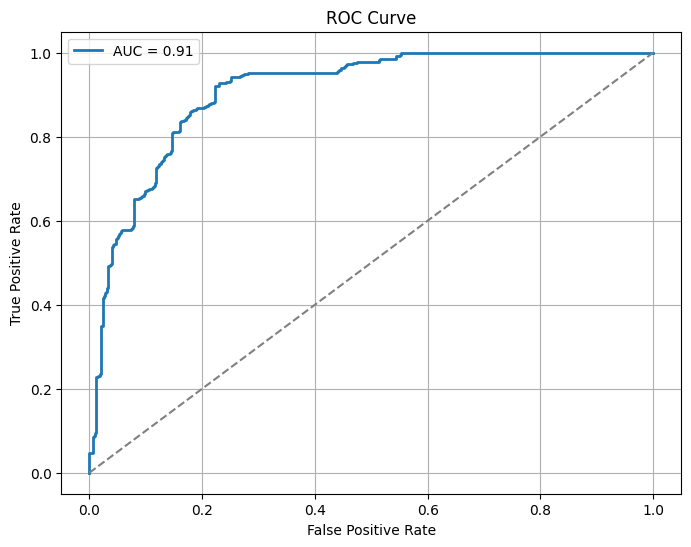

In [22]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Save model pipeline
joblib.dump(clf_pipeline, "logistic_pipeline_model.pkl")
print("Model saved successfully.")

Model saved successfully.


In [46]:
# Predict on New Data

# Load saved model
model = joblib.load("logistic_pipeline_model.pkl")

# Example new data with the actual training features
new_data = pd.DataFrame([{
    'age': 8.0,
    'sex': 1.0,
    'cp': 3,
    'trestbps': 14,
    'chol': 21,
    'fbs': 0,
    'restecg': 1,
    'thalach': 1,
    'exang': 0,
    'oldpeak': 2.0,
    'slope': 1,
    'ca': 0,
    'thal': 3
}])

# Predict
predicted_class = model.predict(new_data)[0]
predicted_proba = model.predict_proba(new_data)[0][1]

print("Predicted Class:", predicted_class)
print("Probability of Class 1 (Hypertension):", round(predicted_proba, 3))

Predicted Class: 1
Probability of Class 1 (Hypertension): 0.613
